<a href="https://colab.research.google.com/github/LWH4Data/Study-code/blob/main/p75_k%ED%8F%89%EA%B7%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 단계
- 데이터 공간에서 임의의 k개 중심점(클래스 or 범주)을 초기화한다.

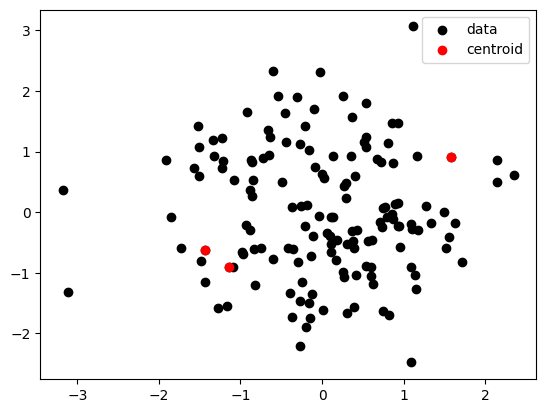

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# 실습에서 사용할 데이터(observation)를 생성한다.
data = np.random.randn(150, 2)

# 군집의 수(k)를 지정한다.
k = 3

# np.random.choice() 함수는 주어진 범위에서 지정한 수만큼 복원 추출한다.
# len(data) = 150이기에 0~149의 범위에서 3개(k)를 추출한 뒤 이를 ridx에 초기화 한다.
ridx = np.random.choice(range(len(data)), k, replace = False)

# ridx의 shape은 (3, )이기 때문에 (3, 2)로 만들기 위해 data에서 ridx를 index로 하여 추출한 뒤
# centroids 변수에 할당한다. centroids.shape()은 (3, 2)가 되며 무작위로 설정한 군집의 중심(k)가 된다.
centroids = data[ridx, :] # data 행렬은 특징별 샘플입니다.

# 생성한 데이터와 군집 시각화
plt.scatter(data[:, 0], data[:, 1], color = 'black', label = 'data')
plt.scatter(centroids[:, 0], centroids[:, 1], color = 'red', label = 'centroid')
plt.legend()

# 2 단계
- 각 데이터(observation)와 각 중심점 사이의 유클리드 거리를 계산한다.
- 이 부분에서 중심의수(k)와 데이터의 수(N)을 기준으로 이중 for문을 사용해야 한다고 생각할 수 있다.
>그러나 벡터와 브로드캐스팅을 이용하면 해당 작업을 간편하게 수행할 수 있다.

<br>

교재에서는 제곱근을 하지 않는다. 그 이유는 다음과 같다. <br>
1. 제곱근을 해도, 하지 않아도 결과에는 차이가 없다. 예를 들어 데이터 a와 중심 A와의 거리가 4, a와 다른 중심 B와의 거리가 9일 때 제곱근을 해도 각 거리는 2와 3이기에 결국 데이터 a는 A에 속하게 된다.
> 데이터의 값을 변화하게 되면 각 데이터끼리의 절대적인 차이는 변화하지만 상대적인 차이는 변화하지 않는다.

In [30]:
# 계산할 거리를 입력받을 영배열을 생성한다.
# dists.shape = (150, 3)
dists = np.zeros((data.shape[0], k))

# centroids[ci, :].shape = (1, 2)이고 data.shape() = (150, 2) 이다.
# 일반적으로 차원이 다르면 연산이 되지 않지만 파이썬 '브로드캐스팅'연산으로 인해
# centroids의 (1, 2) 배열이 모든 data의 (150, 2) 데이터에 반복되어 빼 진다.
# **2 연산은 원소별로 수행되기 때문에 신경쓰지 않아도 된다.
for ci in range(k):
  dists[:, ci] = np.sum((data - centroids[ci, :])**2, axis=1) # 'axis = 1' 은 열방향으로 각 row별로 계산을 수행한다. 즉, 제곱합

# 결과를 확인하면 각 150 개의 데이터(observation)들 마다 3 개의 중심과 과의 거리를 갖기때문에
# dists.shape() = (150, 3)이 된다.
print('dists의 shape은 :', np.shape(dists), '\n', 'dists 값은 : ', '\n', dists)

dists의 shape은 : (150, 3) 
 dists 값은 :  
 [[2.77822314e+00 3.57481424e+00 2.83803545e+00]
 [1.04516238e+01 1.91138902e-01 1.74676681e-03]
 [6.79063860e-01 1.58195214e+01 1.44883437e+01]
 [3.97226330e+00 6.79582468e+00 5.22334235e+00]
 [1.19018311e+00 6.92881342e+00 6.97465164e+00]
 [5.08442017e-01 7.35906042e+00 7.00147838e+00]
 [4.03204963e+00 1.89450170e+00 1.78991880e+00]
 [2.57290451e+00 3.62438997e+00 3.67706230e+00]
 [4.85339780e+00 2.58178247e+00 1.72346045e+00]
 [4.48593980e+00 1.65007735e+00 1.32957927e+00]
 [3.43108371e+00 5.66060845e+00 6.27732291e+00]
 [4.89107158e-01 1.39757355e+01 1.26952214e+01]
 [1.30832765e+01 3.82901365e+00 2.41685167e+00]
 [9.53171073e+00 2.88809132e+00 4.06994350e+00]
 [8.41411091e+00 2.40346755e+00 3.39227756e+00]
 [6.52878806e+00 1.31968604e+00 7.11496651e-01]
 [4.63992644e+00 6.02793320e+00 6.91192897e+00]
 [3.30037814e-01 1.49957812e+01 1.39152085e+01]
 [7.56683655e+00 1.66448978e+00 8.43775270e-01]
 [1.62778407e+00 6.91611092e+00 5.74197868e+00]

# 3 단계
- 각 데이터(observation)를 최소 거리의 군집에 할당.
- np.min()은 최솟값을 반환한다. 반면 np.argmin()은 최솟값의 '인덱스'를 반환한다.



In [31]:
# axis=1, 즉 각 row 별로 최소의 거리를 갖는 값의 인덱스를 뽑아 groupidx에 초기화한다.
# 따라서 index를 통해 각 군집에 할당.
groupidx = np.argmin(dists, axis = 1)

# 4 단계
- 각 클래스 내의 모든 데이터 점의 평균을 계산하여 다시 중심을 설장한다.

In [34]:
# groupidx를 통해 군집별로 평균을 구하여 centroids를 업데이트 한다.
for ki in range(k):
  centroids[ki, :] = [np.mean(data[groupidx==ki, 0]),
                      np.mean(data[groupidx==ki, 1])]

# 새롭게 업데이트된 중심 출력.
print(centroids)

[[ 0.70333927  0.54953531]
 [-1.28086313  0.53265054]
 [-0.11912174 -0.9293523 ]]


# 5 단계
- 최적의 군집이 형성될 때 까지 반복한다(교재에서는 3회).

<br>

1 단게의 시각화와 비교하면 이동된 군집의 중심(centroids)는 더 군집의 중심에 가깝다.



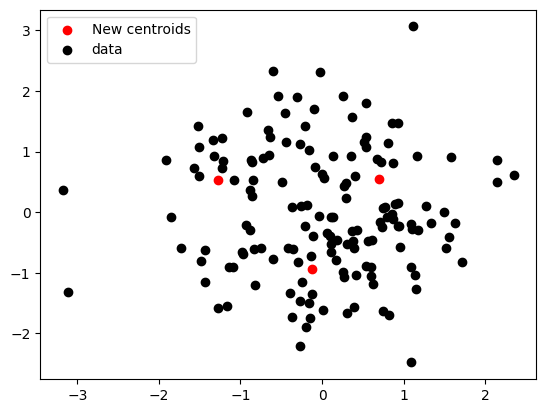

In [45]:
plt.scatter(centroids[:, 0], centroids[:, 1], color = 'red', label = 'New centroids')
plt.scatter(data[:, 0], data[:, 1], color = 'black', label = 'data')
plt.legend()